<a href="https://colab.research.google.com/github/LakshTuenkar/experiment1/blob/main/CC_expt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python code for text handling

In [ ]:
# Step 1: Enter your text
text = input("Enter your text: ")

# Step 2: Convert text to uppercase and lowercase
print("\nUppercase:", text.upper())
print("Lowercase:", text.lower())

# Step 3: Count number of words
words = text.split()
print("\nWord Count:", len(words))

# Step 4: Search for a word
search_word = input("\nEnter word to search: ")
if search_word in text:
    print(f"'{search_word}' found in text.")
else:
    print(f"'{search_word}' NOT found in text.")

# Step 5: Replace a word
old_word = input("\nEnter word to replace: ")
new_word = input("Enter new word: ")
new_text = text.replace(old_word, new_word)
print("\nUpdated Text:", new_text)


Enter your text: I am a dog lover

Uppercase: I AM A DOG LOVER
Lowercase: i am a dog lover

Word Count: 5

Enter word to search: dog
'dog' found in text.

Enter word to replace: dog
Enter new word: cat

Updated Text: I am a cat lover


Python code for file handling

In [ ]:
# Step 1: Upload a text file from your computer
from google.colab import files

uploaded = files.upload()

# Step 2: Read the contents of the uploaded file
filename = list(uploaded.keys())[0]  # Get uploaded filename
with open(filename, 'r') as file:
    content = file.read()
    print("File Content:\n", content)

# Step 3: Write new content to a new file
new_text = "This is a new file created in Google Colab.\n"
new_text += "Original file content:\n" + content

new_filename = "new_file.txt"
with open(new_filename, 'w') as file:
    file.write(new_text)

print("\nNew file created:", new_filename)

# Step 4: Download the new file to your system
files.download(new_filename)


Saving Sample txt.txt to Sample txt (1).txt
File Content:
 Hi, Who are you?

New file created: new_file.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Python code for image processing

Saving sample2.jpg to sample2 (1).jpg
Original Image:


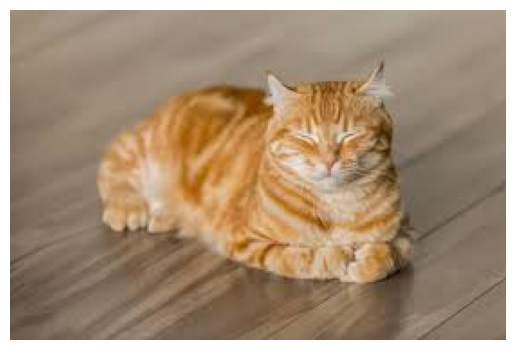

Resized Image:


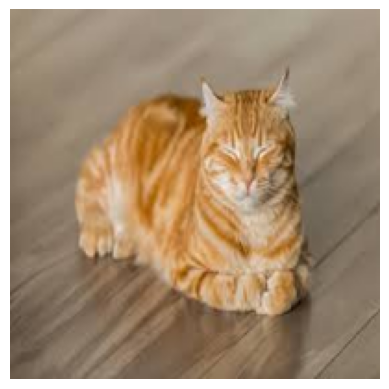

Grayscale Image:


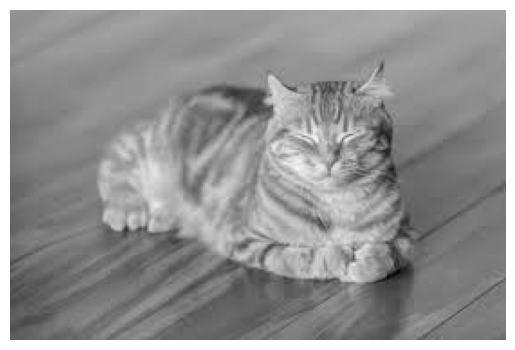

Rotated Image:


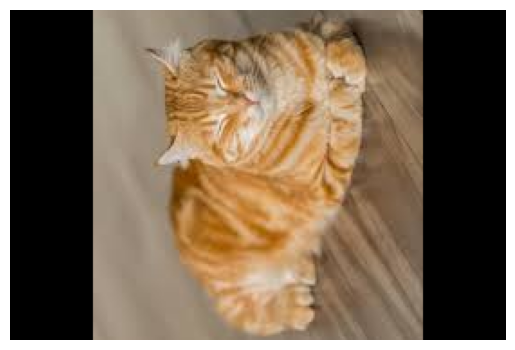

In [ ]:
# Step 1: Install required libraries (if not already)
!pip install pillow opencv-python-headless

# Step 2: Upload an image
from google.colab import files
uploaded = files.upload()

# Step 3: Open and display the image using PIL
from PIL import Image
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
img = Image.open(filename)

# Display original image
print("Original Image:")
plt.imshow(img)
plt.axis('off')
plt.show()

# Step 4: Resize the image
resized_img = img.resize((200, 200))
print("Resized Image:")
plt.imshow(resized_img)
plt.axis('off')
plt.show()

# Step 5: Convert to grayscale
gray_img = img.convert('L')
print("Grayscale Image:")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

# Step 6: Rotate the image
rotated_img = img.rotate(90)
print("Rotated Image:")
plt.imshow(rotated_img)
plt.axis('off')
plt.show()


Python code for handling video files

Saving SampleVideo_1280x720_1mb.mp4 to SampleVideo_1280x720_1mb (4).mp4
Video SampleVideo_1280x720_1mb (4).mp4 loaded successfully!


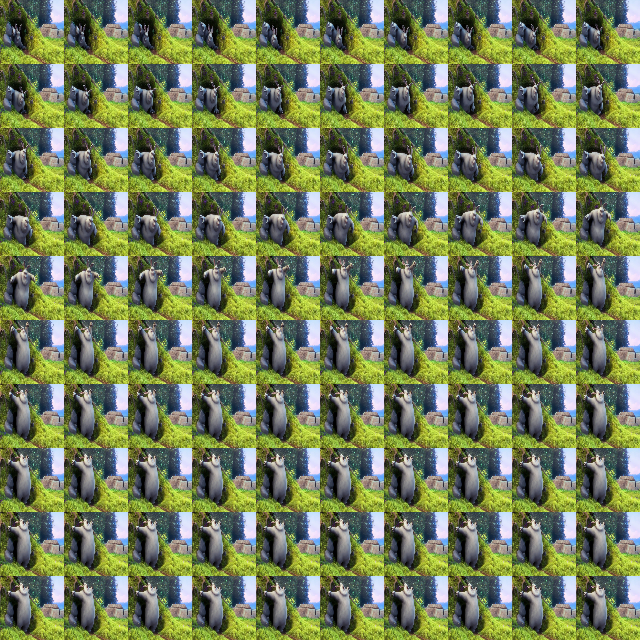

In [5]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload a video file
uploaded = files.upload()

for fn in uploaded.keys():
    cap = cv2.VideoCapture(fn)
    if not cap.isOpened():
        print("Error opening video file")
    else:
        print(f"Video {fn} loaded successfully!")

        # Grid parameters
        rows, cols = 10, 10
        frame_width, frame_height = 64, 64  # Resize for fitting grid
        frame_list = []

        # Read and store 100 frames
        for _ in range(rows * cols):
            ret, frame = cap.read()
            if not ret:
                break
            resized_frame = cv2.resize(frame, (frame_width, frame_height))
            frame_list.append(resized_frame)

        cap.release()

        # Fill the grid with black images if less than 100 frames
        while len(frame_list) < rows * cols:
            frame_list.append(np.zeros((frame_height, frame_width, 3), dtype=np.uint8))

        # Convert to grid
        grid_rows = []
        for i in range(rows):
            row = np.hstack(frame_list[i*cols:(i+1)*cols])
            grid_rows.append(row)

        grid_image = np.vstack(grid_rows)

        # Display the grid image
        cv2_imshow(grid_image)
